# <center> Анализ информации по выбросам

In [31]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# путь, по которому считываем файлы
output_path = 'D:/documents/1_projects/GreenDesign/data/output/'

In [33]:
# считываем файл
df = pd.read_excel(output_path + 'result_prepare.xlsx', index_col='Unnamed: 0')

## Группируем по обществам

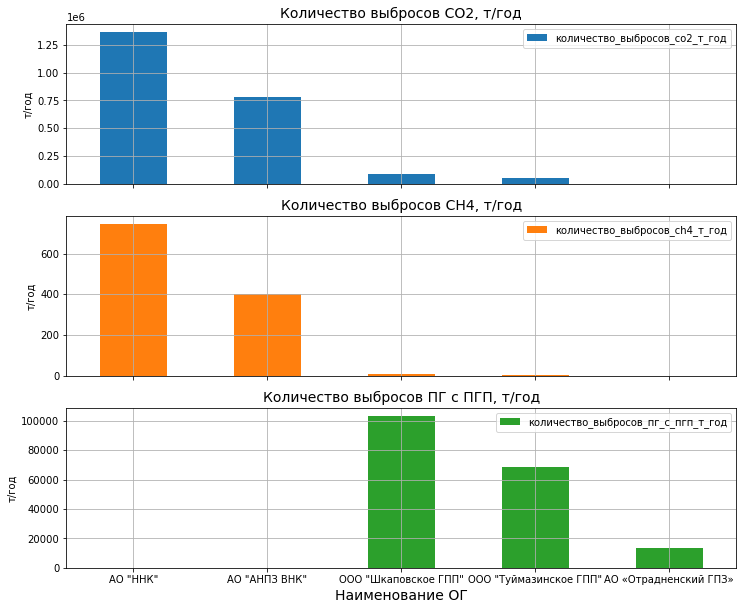

In [34]:
# группируем по обществу и суммируем по выбранным столбцам, сортируем по выбросам СО2
df_og_group = df.groupby(by='Наименование ОГ', as_index=False)[['количество_выбросов_со2_т_год', 'количество_выбросов_сh4_т_год', 'количество_выбросов_пг_с_пгп_т_год']].sum()\
    .sort_values(by='количество_выбросов_со2_т_год', ascending=False)

# строим график
axes = df_og_group.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 10),
    x='Наименование ОГ',
    subplots=True,
    rot=0
);
axes[0].set_title('Количество выбросов СО2, т/год', fontsize=14)
axes[1].set_title('Количество выбросов CH4, т/год', fontsize=14)
axes[2].set_title('Количество выбросов ПГ с ПГП, т/год', fontsize=14);

axes[0].set_ylabel('т/год')
axes[1].set_ylabel('т/год')
axes[2].set_ylabel('т/год');
axes[2].set_xlabel('Наименование ОГ', fontsize=14);

## Группируем по оборудованию

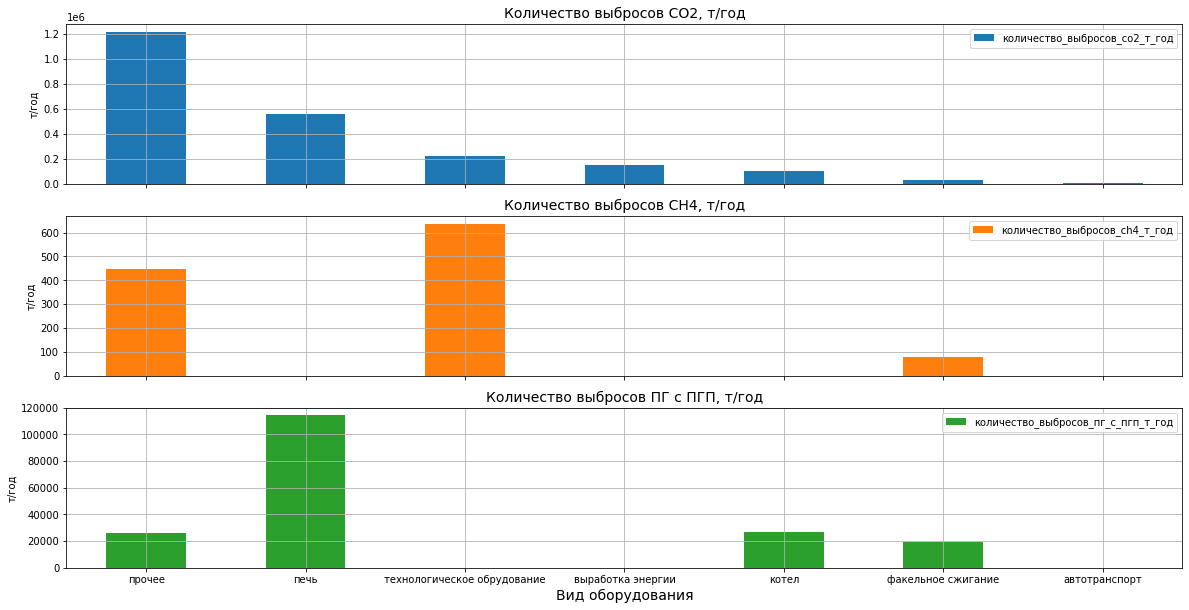

In [35]:
df_equip_group = df.groupby(by='вид_оборудования', as_index=False)[['количество_выбросов_со2_т_год', 'количество_выбросов_сh4_т_год', 'количество_выбросов_пг_с_пгп_т_год']].sum()\
    .sort_values(by='количество_выбросов_со2_т_год', ascending=False)

axes = df_equip_group.plot( 
    kind='bar', 
    grid=True, 
    figsize=(20, 10),
    x='вид_оборудования',
    subplots=True,
    rot=0
);
axes[0].set_title('Количество выбросов СО2, т/год', fontsize=14)
axes[1].set_title('Количество выбросов CH4, т/год', fontsize=14)
axes[2].set_title('Количество выбросов ПГ с ПГП, т/год', fontsize=14);

axes[0].set_ylabel('т/год')
axes[1].set_ylabel('т/год')
axes[2].set_ylabel('т/год')

axes[2].set_xlabel('Вид оборудования', fontsize=14);

## Cохраняем инфу по каждому обществу на отдельный лист

In [39]:
with pd.ExcelWriter(output_path + 'result_analysys.xlsx') as writer:
    # сохраняем исходную таблицу на лист main
    df.to_excel(writer, sheet_name='main')
    # по каждому обществу сохраняем инфу на отдельных лист, с названием как само общество
    for og in df['Наименование ОГ'].unique():
        mask = df['Наименование ОГ'] == og
        sheet_name = og
        curr_df = df[mask]
            
        curr_df.to_excel(writer, sheet_name=sheet_name)